# Figures of feature distributions (2, 3, S7, S8)

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
features = pd.read_csv('../data/run-0/responsory/subset/train-features.csv', index_col=0)
modes = pd.read_csv('../data/run-0/responsory/subset/train-chants.csv', index_col=0)['mode']
features['mode'] = modes
pitch_features = [f'freq_MIDI_{i}' for i in range(53, 87)]
pitch_class_features = [f'freq_pitch_class_{i}' for i in range(12)]
repetition_features = [f'repetition_score_MIDI_{i}' for i in range(53, 87)]

In [3]:
def unstack_feature_values(features, feature_names, append=['mode']):
    df = features[feature_names].unstack().reset_index()
    df.columns = ['feature', 'id', 'value']
    df = df.join(features[append], on='id')
    return df

In [4]:
def chant_notename(pitch):
    names = ['C', None, 'D', 'Eb', 'E', 'F', None, 'G', None, 'A', 'Bb', 'B', 'C']
    pitch_class = pitch % 12
    return names[pitch_class]

In [5]:
def chant_pitches(start, end):
    scale = [0, 2, 4, 5, 7, 9, 10, 11]
    return [p for p in range(start, end+1) if p % 12 in scale]

## Figure 2: traditional features of finals, ambitus, initial

In [6]:
unstacked = unstack_feature_values(features, ['final', 'initial', 'lowest', 'highest'])

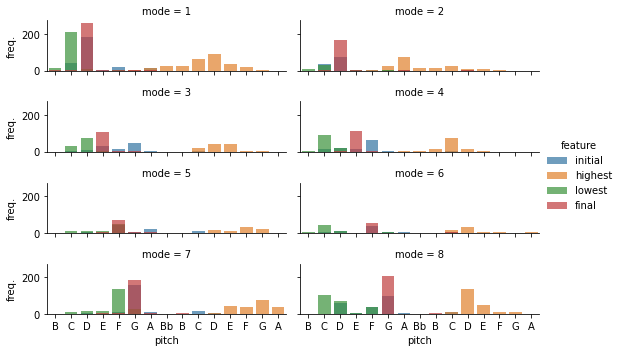

In [7]:
g = sns.FacetGrid(unstacked, hue="feature", col="mode", 
                  col_wrap=2, aspect=3, height=1.25,
                  hue_order=['final', 'lowest', 'highest', 'initial'][::-1])
pitches = chant_pitches(59, 81)
g.map(sns.countplot, "value", order=pitches, alpha=.7)
g.add_legend()
g.set_xticklabels([chant_notename(p) for p in pitches])
g.set_axis_labels('pitch', 'freq.')
savefig('../figures/fig02/fig02-traditional-feature-distributions.pdf')

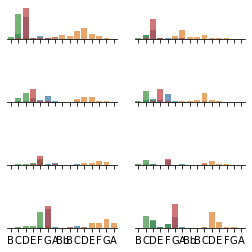

In [8]:
g = sns.FacetGrid(unstacked, hue="feature", col="mode", 
                  col_wrap=2, aspect=2, height=1,
                  hue_order=['final', 'lowest', 'highest', 'initial'][::-1])
pitches = chant_pitches(59, 81)
g.map(sns.countplot, "value", order=pitches, alpha=.7)
g.set_xticklabels([chant_notename(p) for p in pitches])
g.set_axis_labels('', '')
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)
savefig('../figures/fig02/fig02-traditional-feature-distributions-clean.pdf')

## Figure 3: Pitch profiles

In [9]:
pitch_freqs = unstack_feature_values(features, pitch_features)
pitch_freqs['pitch'] = pitch_freqs['feature'].str.replace('freq_MIDI_', '').map(int)
pitch_freqs = pitch_freqs.query('pitch > 59 and pitch < 80')

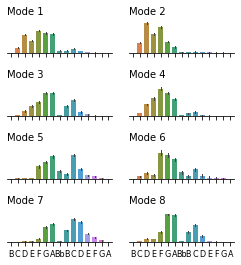

In [10]:
g = sns.FacetGrid(pitch_freqs, col="mode", col_wrap=2, aspect=2, height=1)
pitches = chant_pitches(59, 81)
g.map(sns.barplot, "pitch", 'value', order=pitches, palette="husl",
     errwidth=1)
g.set_xticklabels([chant_notename(p) for p in pitches], fontsize=8)
g.set_axis_labels('', '')
g.set(yticks=[])
g.despine(left=True)
g.set_titles("Mode {col_name}", x=0, ha='left', y=0)
# g.set_titles("")
savefig('../figures/fig03/fig03-pitch-profiles-clean.pdf')

## Figure S7: Pitch class profiles

In [11]:
pitch_class_freqs = unstack_feature_values(features, pitch_class_features)
pitch_class_freqs['pitch_class'] = pitch_class_freqs['feature'].str.replace('freq_pitch_class_', '').map(int)

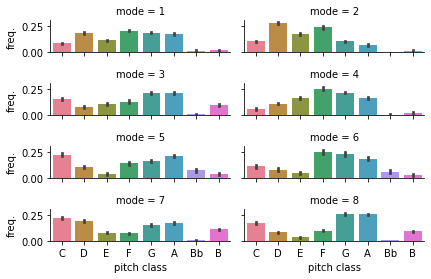

In [12]:
g = sns.FacetGrid(pitch_class_freqs, col="mode", col_wrap=2, aspect=3, height=1)
pitches = chant_pitches(0, 11)
g.map(sns.barplot, "pitch_class", 'value', order=pitches, palette="husl")
g.set_xticklabels([chant_notename(p) for p in pitches])
g.set_axis_labels('pitch class', 'freq.')
savefig('../figures/figS07-pitch-class-profiles.pdf')

### Repetition profiles

In [13]:
repetition_scores = unstack_feature_values(features, repetition_features)
repetition_scores['pitch'] = repetition_scores['feature'].str.replace(
    'repetition_score_MIDI_', '').map(int)

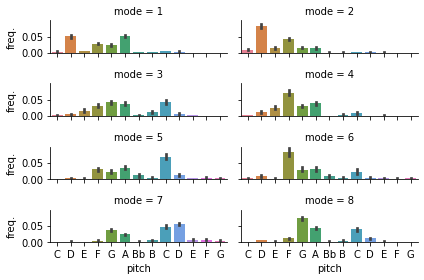

In [14]:
g = sns.FacetGrid(repetition_scores, col="mode", 
                  col_wrap=2, aspect=3, height=1)
pitches = chant_pitches(60, 80)
g.map(sns.barplot, "pitch", 'value', order=pitches, palette="husl")
g.set_xticklabels([chant_notename(p) for p in pitches])
g.set_axis_labels('pitch', 'freq.')
savefig('../figures/figS08-repetition-profiles.pdf')